# Bechdel Test and Gender Equality Analysis in Hollywood:
### Dataset source: https://data.world/carolee/women-in-movies

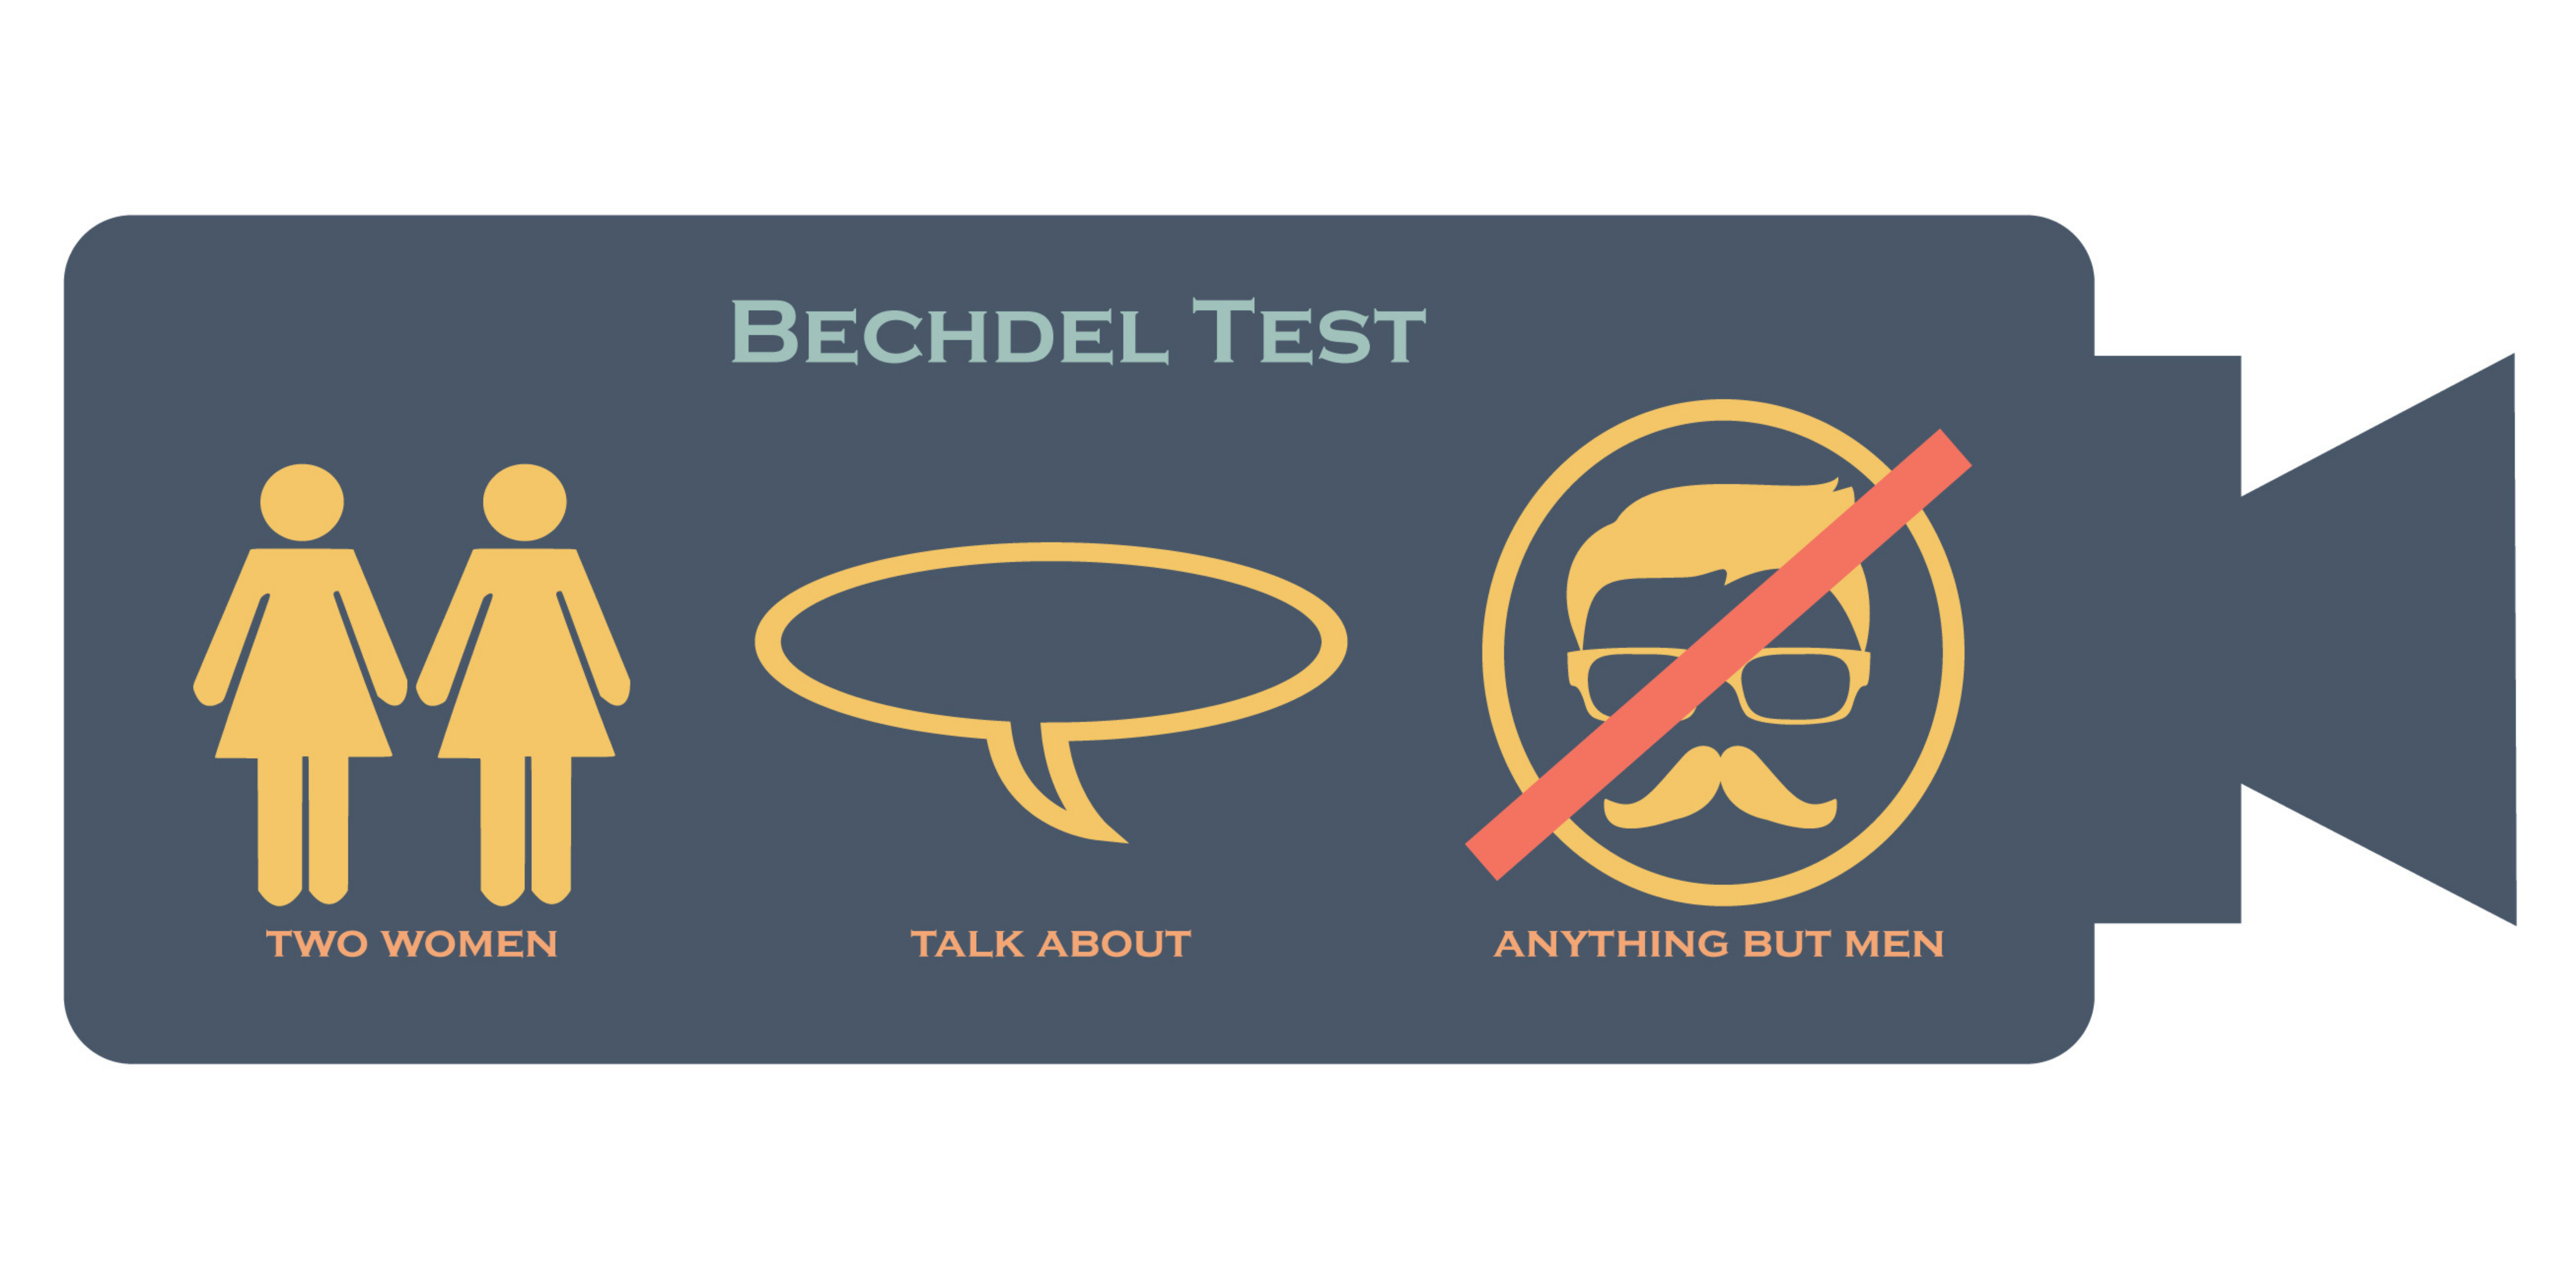

In [1]:
from IPython.display import Image
Image(filename='BechdelPoster.png')

#### Audiences and creators know that on one level or another, there’s an inherent gender bias in the movie business — whether it’s the disproportionately low number of films with female leads, the process of pigeonholing actresses into predefined roles (action chick, romantic interest, middle-aged mother, etc.), or the lack of serious character development for women on screen compared to their male counterparts. What’s challenging is quantifying this dysfunction, putting numbers to a trend that is — at least anecdotally — a pretty clear reality.

#### One of the most enduring tools to measure Hollywood’s gender bias is a test originally promoted by cartoonist Alison Bechdel in a 1985 strip from her “Dykes To Watch Out For” series. Bechdel said that if a movie can satisfy three criteria — there are at least two named women in the picture, they have a conversation with each other at some point, and that conversation isn’t about a male character — then it passes “The Rule,” whereby female characters are allocated a bare minimum of depth.

## -Columns of dataset:
#### -year -> year of film production
#### -title -> movie's name
#### -clean_test -> bechdel steps (ok, notalk, men, nowomen, dubious)
#### -binary -> bechdel test (PASS or FAIL)
#### -budget -> movie budget
#### -domgross -> movie domestic gross
#### -intgross -> movie international gross
#### -decade_code -> movie decade code

## Importing libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-whitegrid")

## Reading dataset:

In [3]:
data = pd.read_csv("movies.csv")

## Example of the data:

In [4]:
data.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


## Dataset size:

In [5]:
data.shape

(1794, 15)

## Clean the dataset and remove useless data:

In [6]:
data.drop(columns="imdb", inplace=True)
data.drop(columns="test", inplace=True)
data.drop(columns="code", inplace=True)
data.drop(columns="period code", inplace=True)

## Look at what we want:

In [7]:
data.head()

,year,title,clean_test,binary,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013,decade code
0,2013,21 &amp; Over,notalk,FAIL,13000000,25682380.0,42195766.0,13000000,25682380.0,42195766.0,1.0
1,2012,Dredd 3D,ok,PASS,45000000,13414714.0,40868994.0,45658735,13611086.0,41467257.0,1.0
2,2013,12 Years a Slave,notalk,FAIL,20000000,53107035.0,158607035.0,20000000,53107035.0,158607035.0,1.0
3,2013,2 Guns,notalk,FAIL,61000000,75612460.0,132493015.0,61000000,75612460.0,132493015.0,1.0
4,2013,42,men,FAIL,40000000,95020213.0,95020213.0,40000000,95020213.0,95020213.0,1.0


In [8]:
data.tail()

,year,title,clean_test,binary,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013,decade code
1789,1971,Shaft,notalk,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0,NaN
1790,1971,Straw Dogs,notalk,FAIL,25000000,10324441.0,11253821.0,143862856,59412143.0,64760273.0,NaN
1791,1971,The French Connection,notalk,FAIL,2200000,41158757.0,41158757.0,12659931,236848653.0,236848653.0,NaN
1792,1971,Willy Wonka &amp; the Chocolate Factory,men,FAIL,3000000,4000000.0,4000000.0,17263543,23018057.0,23018057.0,NaN
1793,1970,Beyond the Valley of the Dolls,ok,PASS,1000000,9000000.0,9000000.0,5997631,53978683.0,53978683.0,NaN


## Finding the nulls:

In [9]:
data.isna().sum()

year               0
title              0
clean_test         0
binary             0
budget             0
domgross          17
intgross          11
budget_2013        0
domgross_2013     18
intgross_2013     11
decade code      179
dtype: int64

## Filling the nan decades:

In [10]:
data.loc[1615:1740] = data.loc[1615:1740].replace(np.nan, 4.0)
data.loc[1740:1794] = data.loc[1740:1794].replace(np.nan, 5.0)

## Removing dubious:

In [11]:
dub = data[data["clean_test"] == "dubious"]
data = data.replace("dubious", np.nan)

## Dropping nulls:

In [12]:
data.dropna(inplace=True)

## Checking nulls again:

In [13]:
data.isna().sum()

year             0
title            0
clean_test       0
binary           0
budget           0
domgross         0
intgross         0
budget_2013      0
domgross_2013    0
intgross_2013    0
decade code      0
dtype: int64

## Separating the Passed from the Failed in all decades:

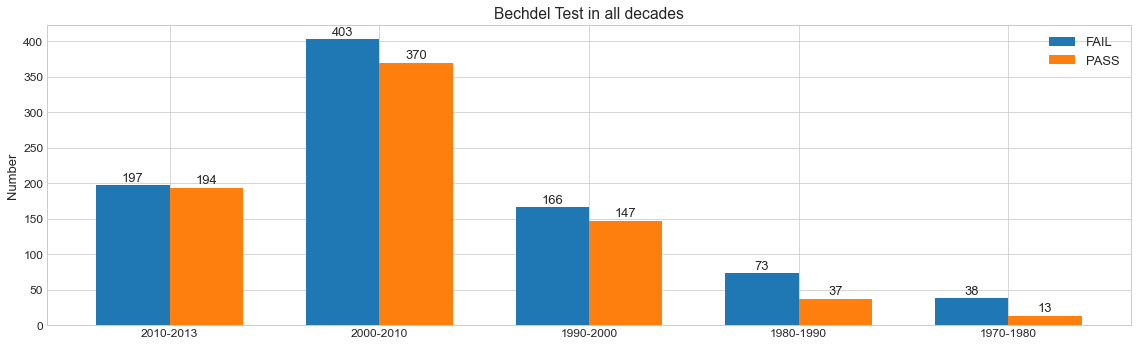

In [14]:
plt.rc('font', size=13)
plt.rc('legend', fontsize=13)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

passed_bt_in_all_decade, failed_bt_in_all_decade = [], []

decade_float = 1.0

for i in range(5):
    failed_bt_in_all_decade.append(data[data["decade code"] == decade_float].binary.value_counts()[0])
    passed_bt_in_all_decade.append(data[data["decade code"] == decade_float].binary.value_counts()[1])
    decade_float += 1
    

labels = ['2010-2013', '2000-2010', '1990-2000', '1980-1990', '1970-1980']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(16,5))

rect1 = ax.bar(x-width/2, failed_bt_in_all_decade, width, label="FAIL")
rect2 = ax.bar(x+width/2, passed_bt_in_all_decade, width, label="PASS")

ax.set_ylabel('Number')
ax.set_title('Bechdel Test in all decades')
plt.xticks(x, labels)
ax.legend()

ax.bar_label(rect1, padding=1)
ax.bar_label(rect2, padding=1)

fig.tight_layout()
plt.show()

## Category of failures:

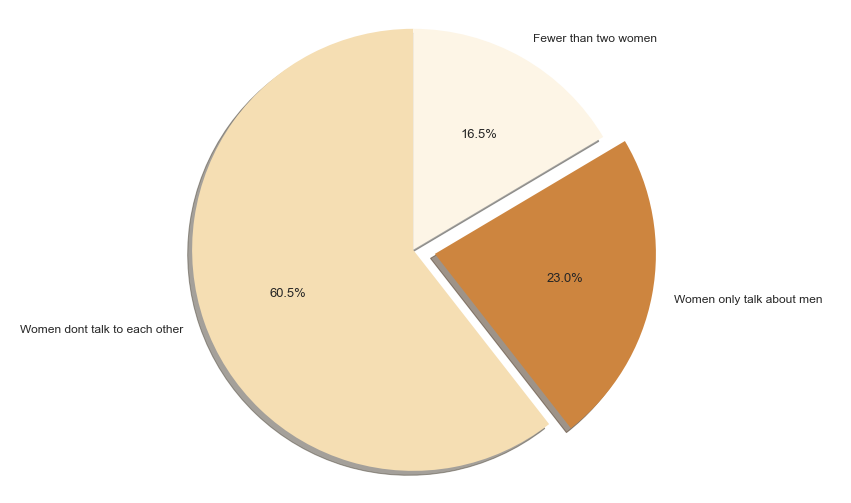

In [15]:
all_failed = data[data["binary"] == "FAIL"].clean_test.value_counts()

labels = 'Women dont talk to each other', 'Women only talk about men', 'Fewer than two women'
explode = [0, 0.1, 0]

fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(all_failed, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
       colors=['wheat','peru', 'oldlace'], explode=explode)

ax1.axis('equal')

plt.show()

## Dispersal of the relationship between budget and domestic gross profit:

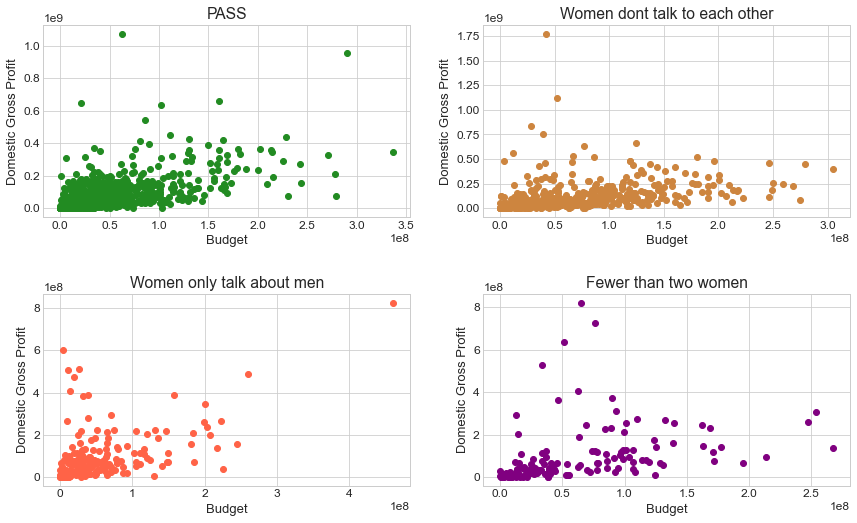

In [16]:
labels = ['PASS', 'Women dont talk to each other', 'Women only talk about men', 'Fewer than two women']

scpassed_budget = data[data["clean_test"] == 'ok'].budget_2013
scnowomen_budget = data[data["clean_test"] == 'nowomen'].budget_2013
scnotalk_budget = data[data["clean_test"] == 'notalk'].budget_2013
scmen_budget = data[data["clean_test"] == 'men'].budget_2013

scpassed_dom = data[data["clean_test"] == 'ok'].domgross_2013
scnowomen_dom = data[data["clean_test"] == 'nowomen'].domgross_2013
scnotalk_dom = data[data["clean_test"] == 'notalk'].domgross_2013
scmen_dom = data[data["clean_test"] == 'men'].domgross_2013

fig, ([ax1,ax2],[ax3, ax4]) = plt.subplots(2, 2, figsize=(14, 8))
ax1.scatter(x=scpassed_budget, y=scpassed_dom, color="forestgreen")
ax1.set_xlabel("Budget")
ax1.set_ylabel("Domestic Gross Profit")
ax1.set_title(labels[0])

ax2.scatter(x=scnotalk_budget, y=scnotalk_dom, color="peru")
ax2.set_xlabel("Budget")
ax2.set_ylabel("Domestic Gross Profit")
ax2.set_title(labels[1])

ax3.scatter(x=scmen_budget, y=scmen_dom, color="tomato")
ax3.set_xlabel("Budget")
ax3.set_ylabel("Domestic Gross Profit")
ax3.set_title(labels[2])

ax4.scatter(x=scnowomen_budget, y=scnowomen_dom, color="purple")
ax4.set_xlabel("Budget")
ax4.set_ylabel("Domestic Gross Profit")
ax4.set_title(labels[3])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.2, hspace=0.4)

plt.show()

## Dispersal of the relationship between budget and international gross profit:

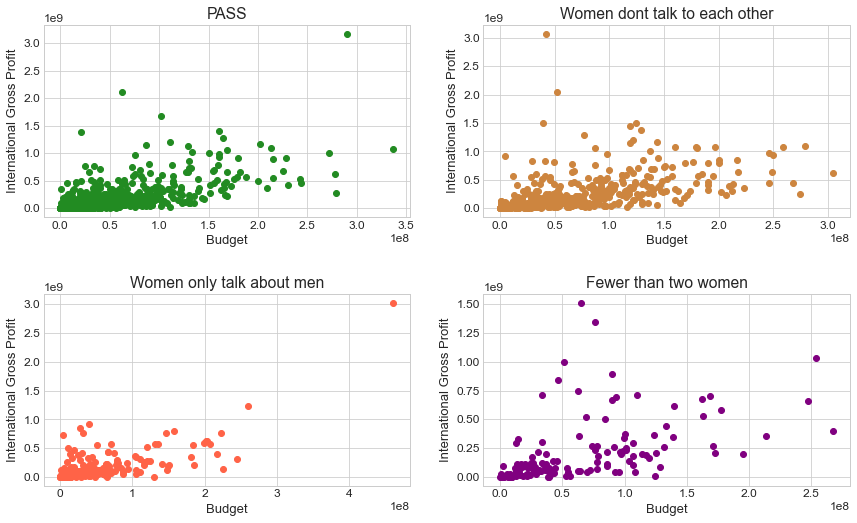

In [17]:
labels = ['PASS', 'Women dont talk to each other', 'Women only talk about men', 'Fewer than two women']

scpassed_budget = data[data["clean_test"] == 'ok'].budget_2013
scnowomen_budget = data[data["clean_test"] == 'nowomen'].budget_2013
scnotalk_budget = data[data["clean_test"] == 'notalk'].budget_2013
scmen_budget = data[data["clean_test"] == 'men'].budget_2013

scpassed_int = data[data["clean_test"] == 'ok'].intgross_2013
scnowomen_int = data[data["clean_test"] == 'nowomen'].intgross_2013
scnotalk_int = data[data["clean_test"] == 'notalk'].intgross_2013
scmen_int = data[data["clean_test"] == 'men'].intgross_2013

fig, ([ax1,ax2],[ax3, ax4]) = plt.subplots(2, 2, figsize=(14, 8))
ax1.scatter(x=scpassed_budget, y=scpassed_int, color="forestgreen")
ax1.set_xlabel("Budget")
ax1.set_ylabel("International Gross Profit")
ax1.set_title(labels[0])

ax2.scatter(x=scnotalk_budget, y=scnotalk_int, color="peru")
ax2.set_xlabel("Budget")
ax2.set_ylabel("International Gross Profit")
ax2.set_title(labels[1])

ax3.scatter(x=scmen_budget, y=scmen_int, color="tomato")
ax3.set_xlabel("Budget")
ax3.set_ylabel("International Gross Profit")
ax3.set_title(labels[2])

ax4.scatter(x=scnowomen_budget, y=scnowomen_int, color="purple")
ax4.set_xlabel("Budget")
ax4.set_ylabel("International Gross Profit")
ax4.set_title(labels[3])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.2, hspace=0.4)

plt.show()

## Median budget for each movie:

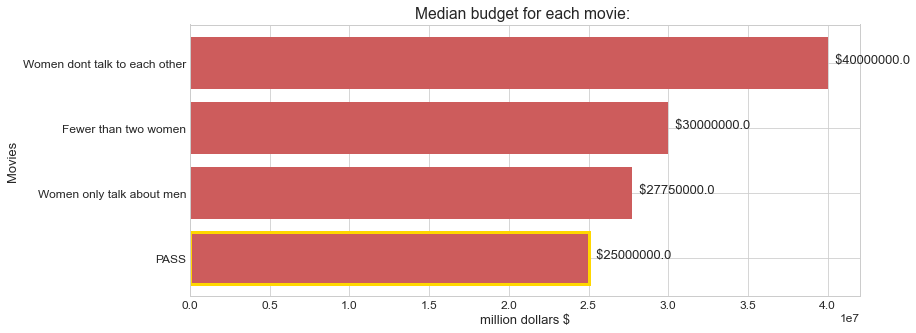

In [18]:
passed_budget = data[data["clean_test"] == 'ok'].budget.sort_values().median()
nowomen_budget = data[data["clean_test"] == 'nowomen'].budget.sort_values().median()
notalk_budget = data[data["clean_test"] == 'notalk'].budget.sort_values().median()
men_budget = data[data["clean_test"] == 'men'].budget.sort_values().median()

plt.rcParams["figure.figsize"] = (12, 5)

labels = ['PASS', 'Women only talk about men', 'Fewer than two women', 'Women dont talk to each other']

x_pos = [i for i, _ in enumerate(labels)]

plt.barh(x_pos, [passed_budget, men_budget, nowomen_budget, notalk_budget], color='indianred',
         linewidth=[3, 0, 0, 0], edgecolor="gold")

plt.xlabel("million dollars $")
plt.ylabel("Movies")
plt.title("Median budget for each movie: ")

plt.yticks(x_pos, labels)

for index, value in enumerate([passed_budget, men_budget, nowomen_budget, notalk_budget]):
    plt.text(value, index, '  $' + str(value))

plt.show()

## Median budget for each movie adjusted by 2013 dollars:

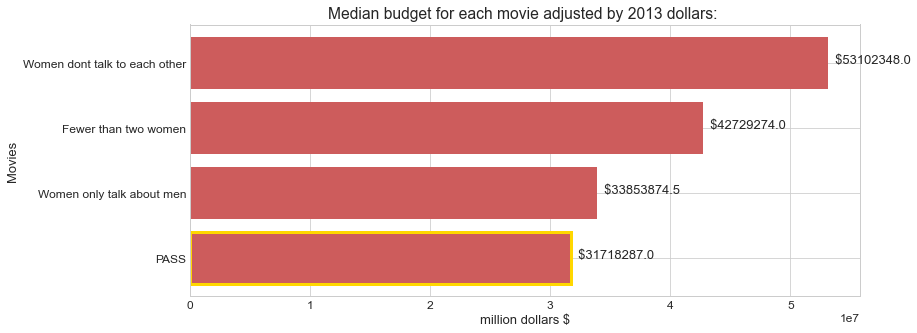

In [19]:
passed_budget_2013 = data[data["clean_test"] == 'ok'].budget_2013.sort_values().median()
nowomen_budget_2013 = data[data["clean_test"] == 'nowomen'].budget_2013.sort_values().median()
notalk_budget_2013 = data[data["clean_test"] == 'notalk'].budget_2013.sort_values().median()
men_budget_2013 = data[data["clean_test"] == 'men'].budget_2013.sort_values().median()

plt.rcParams["figure.figsize"] = (12, 5)

labels = ['PASS', 'Women only talk about men', 'Fewer than two women', 'Women dont talk to each other']

x_pos = [i for i, _ in enumerate(labels)]

plt.barh(x_pos, [passed_budget_2013, men_budget_2013, nowomen_budget_2013, notalk_budget_2013], color='indianred',
         linewidth=[3, 0, 0, 0], edgecolor="gold")

plt.xlabel("million dollars $")
plt.ylabel("Movies")
plt.title("Median budget for each movie adjusted by 2013 dollars: ")

plt.yticks(x_pos, labels)

for index, value in enumerate([passed_budget_2013, men_budget_2013, nowomen_budget_2013, notalk_budget_2013]):
    plt.text(value, index, '  $' + str(value))

plt.show()

## The dollar earned for every dollar spent adjusted by 2013 dollars (1990-2013): 

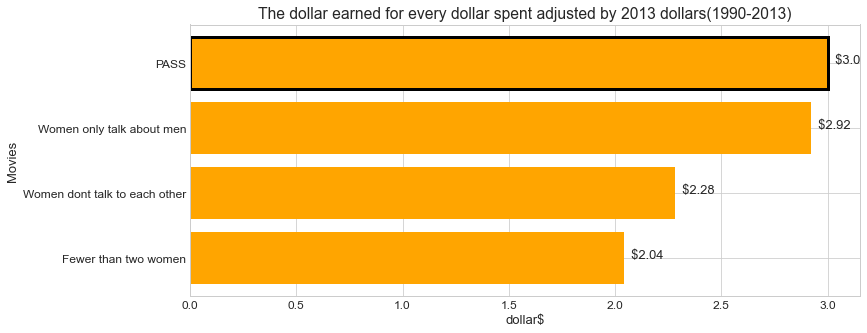

In [20]:
d = data[data["year"] >= 1990]

ok_budget = d[d["clean_test"] == "ok"].budget_2013.sort_values().median()
ok_dom = d[d["clean_test"] == "ok"].domgross_2013.sort_values().median()
ok_int = d[d["clean_test"] == "ok"].intgross_2013.sort_values().median()
ok_profit = ((ok_int + ok_dom) - ok_budget) / ok_budget
ok_profit = float(f'{ok_profit:.3f}'[:-1])

nt_budget = d[d["clean_test"] == "notalk"].budget_2013.sort_values().median()
nt_dom = d[d["clean_test"] == "notalk"].domgross_2013.sort_values().median()
nt_int = d[d["clean_test"] == "notalk"].intgross_2013.sort_values().median()
nt_profit = ((nt_int + nt_dom) - nt_budget) / nt_budget
nt_profit = float(f'{nt_profit:.3f}'[:-1])

nw_budget = d[d["clean_test"] == "nowomen"].budget_2013.sort_values().median()
nw_dom = d[d["clean_test"] == "nowomen"].domgross_2013.sort_values().median()
nw_int = d[d["clean_test"] == "nowomen"].intgross_2013.sort_values().median()
nw_profit = ((nw_int + nw_dom) - nw_budget) / nw_budget
nw_profit = float(f'{nw_profit:.3f}'[:-1])

m_budget = d[d["clean_test"] == "men"].budget_2013.sort_values().median()
m_dom = d[d["clean_test"] == "men"].domgross_2013.sort_values().median()
m_int = d[d["clean_test"] == "men"].intgross_2013.sort_values().median()
m_profit = ((m_int + m_dom) - m_budget) / m_budget
m_profit = float(f'{m_profit:.3f}'[:-1])

plt.rcParams["figure.figsize"] = (12, 5)

labels = ['Fewer than two women', 'Women dont talk to each other', 'Women only talk about men', 'PASS']

x_pos = [i for i, _ in enumerate(labels)]

plt.barh(x_pos, [nw_profit, nt_profit, m_profit, ok_profit], color='orange',
         linewidth=[0, 0, 0, 3], edgecolor="black")

plt.xlabel("dollar$")
plt.ylabel("Movies")
plt.title("The dollar earned for every dollar spent adjusted by 2013 dollars(1990-2013)")

plt.yticks(x_pos, labels)

for index, value in enumerate([nw_profit, nt_profit, m_profit, ok_profit]):
    plt.text(value, index, '  $' + str(value))

plt.show()

## The dollar earned for every dollar spent adjusted by 2013 dollars (1970-2013): 

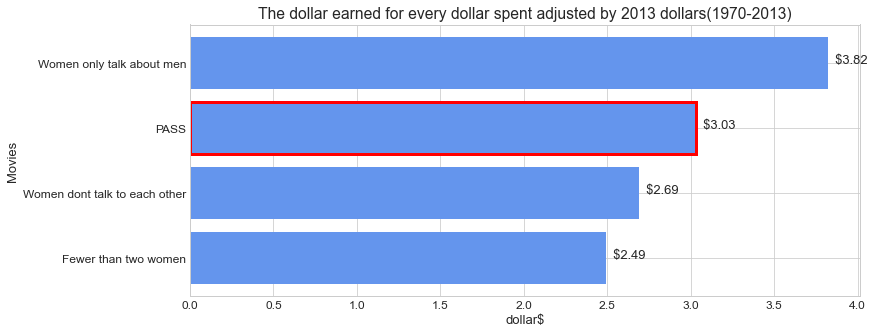

In [21]:
ok_budget = data[data["clean_test"] == "ok"].budget_2013.sort_values().median()
ok_dom = data[data["clean_test"] == "ok"].domgross_2013.sort_values().median()
ok_int = data[data["clean_test"] == "ok"].intgross_2013.sort_values().median()
ok_profit = ((ok_int + ok_dom) - ok_budget) / ok_budget
ok_profit = float(f'{ok_profit:.3f}'[:-1])

nt_budget = data[data["clean_test"] == "notalk"].budget_2013.sort_values().median()
nt_dom = data[data["clean_test"] == "notalk"].domgross_2013.sort_values().median()
nt_int = data[data["clean_test"] == "notalk"].intgross_2013.sort_values().median()
nt_profit = ((nt_int + nt_dom) - nt_budget) / nt_budget
nt_profit = float(f'{nt_profit:.3f}'[:-1])

nw_budget = data[data["clean_test"] == "nowomen"].budget_2013.sort_values().median()
nw_dom = data[data["clean_test"] == "nowomen"].domgross_2013.sort_values().median()
nw_int = data[data["clean_test"] == "nowomen"].intgross_2013.sort_values().median()
nw_profit = ((nw_int + nw_dom) - nw_budget) / nw_budget
nw_profit = float(f'{nw_profit:.3f}'[:-1])

m_budget = data[data["clean_test"] == "men"].budget_2013.sort_values().median()
m_dom = data[data["clean_test"] == "men"].domgross_2013.sort_values().median()
m_int = data[data["clean_test"] == "men"].intgross_2013.sort_values().median()
m_profit = ((m_int + m_dom) - m_budget) / m_budget
m_profit = float(f'{m_profit:.3f}'[:-1])

plt.rcParams["figure.figsize"] = (12, 5)

labels = ['Fewer than two women', 'Women dont talk to each other', 'PASS', 'Women only talk about men']

x_pos = [i for i, _ in enumerate(labels)]

plt.barh(x_pos, [nw_profit, nt_profit, ok_profit, m_profit], color='cornflowerblue',
         linewidth=[0, 0, 3, 0], edgecolor="red")

plt.xlabel("dollar$")
plt.ylabel("Movies")
plt.title("The dollar earned for every dollar spent adjusted by 2013 dollars(1970-2013)")

plt.yticks(x_pos, labels)

for index, value in enumerate([nw_profit, nt_profit, ok_profit, m_profit]):
    plt.text(value, index, '  $' + str(value))

plt.show()